In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [3]:
df.count()

Unnamed: 0              2219
ID                      2219
Year_Birth              2219
Education               2219
Marital_Status          2219
Income                  2219
Kidhome                 2219
Teenhome                2219
Dt_Customer             2219
Recency                 2219
MntWines                2219
MntFruits               2219
MntMeatProducts         2219
MntFishProducts         2219
MntSweetProducts        2219
MntGoldProds            2219
NumDealsPurchases       2219
NumWebPurchases         2219
NumCatalogPurchases     2219
NumStorePurchases       2219
NumWebVisitsMonth       2219
Response                2219
Complain                2219
Age                     2219
HouseHoldMembers        2219
Total_Children          2219
Total_Spent             2219
BuyingPower             2219
TotalPurchases          2219
Dt_CustomerConverted    2219
SinceEnrolled           2219
Interest                2219
CLV                     2219
AOV                     2219
AppliedPromo  

In [4]:
df.dropna(inplace=True)

In [5]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [6]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'Recency', 'Complain','Age', 'Complain', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [7]:
data.count()

Income                 2219
Total_Children         2219
Marital_Status         2219
Education              2219
Response               2219
Recency                2219
Complain               2219
Age                    2219
Complain               2219
MntMeatProducts        2219
MntFishProducts        2219
MntSweetProducts       2219
MntGoldProds           2219
NumDealsPurchases      2219
NumWebPurchases        2219
NumCatalogPurchases    2219
NumStorePurchases      2219
dtype: int64

In [8]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [9]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [10]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

oversampler = RandomOverSampler(random_state=0)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [12]:
classifier = SGDClassifier()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [13]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [14]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.6877
Precision: 0.2928
Recall: 0.7778
F1: 0.4254
AUC: 0.7249


In [15]:
print(len(preds))

666


# Figures

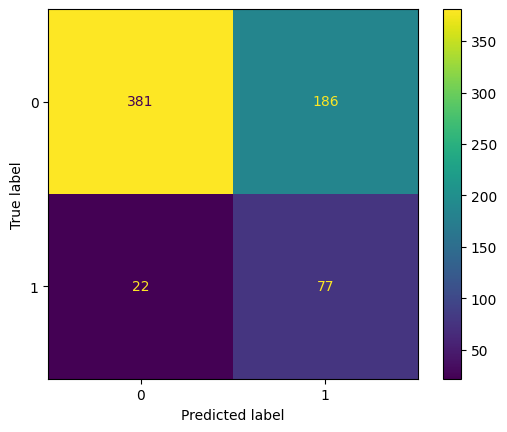

In [16]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)
# Normalize the confusion matrix to get probabilities
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier 

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier 

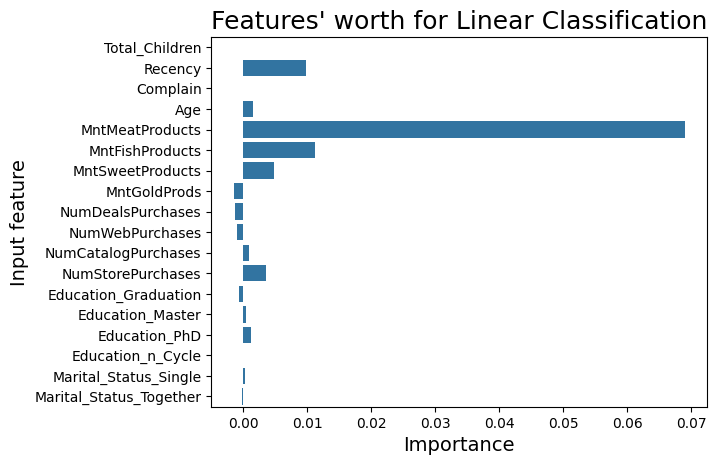

MntMeatProducts: 0.06901901901901906
MntFishProducts: 0.01126126126126131
Recency: 0.009809809809809859
MntSweetProducts: 0.004804804804804848
NumStorePurchases: 0.003653653653653699
Age: 0.0016016016016016433
Education_PhD: 0.00130130130130132
NumCatalogPurchases: 0.0009009009009009435
Education_Master: 0.00045045045045045696
Marital_Status_Single: 0.00030030030030032316
Total_Children: 0.0
Complain: 0.0
Education_n_Cycle: 0.0
Complain: 0.0
Marital_Status_Together: -0.00025025025025023534
Education_Graduation: -0.000700700700700659
NumWebPurchases: -0.0009009009009008584
NumDealsPurchases: -0.001201201201201152
MntGoldProds: -0.0014514514514514022


In [17]:
pipeline = Pipeline([
    ('classifier', classifier)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for Linear Classification", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")